# **Face regconition**
This project use to regconize the character in the serie Breaking Bad


Firstly, we load the library and the data

In [3]:
%%capture
!pip install wget
import wget

In [4]:
%%capture
!pip install intel-tensorflow
!pip install mtcnn==0.1.0
!pip install tensorflow==2.3

import os

In [5]:
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/weights.zip')
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/fr_utils.py')
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/inception_blocks_v2.py')
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/image.zip')
wget.download('https://github.com/dautroc1/Face-regconition/raw/main/data/test.zip')

'test.zip'

In [6]:

from PIL import Image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *
from IPython.display import Image as Iimage
import tensorflow.keras.backend
import keras
if K.backend()=='tensorflow':
    keras.backend.set_image_data_format("channels_last")



%matplotlib inline
%load_ext autoreload
%autoreload 2



In [7]:
%%capture
!unzip weights.zip
!unzip image.zip
!unzip test.zip

Then, we need to extract face from the data and resize to the correct format

In [ ]:
%%capture
prepare_data()

We have already trained the model. Now, we are loading the weights into the model.

In [9]:
K.set_image_data_format('channels_first')
FRmodel = faceRecoModel(input_shape=(3,96, 96))
print("Total Params:", FRmodel.count_params())

Total Params: 3743280


In [10]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
   
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis= -1)
    
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
    
    
    return loss

In [11]:
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)

This function is used to add images to database.

In [12]:
def encoding_all(database):
  wal = str('Walter White')
  files_and_directories = os.listdir("train/Walter white/")
  for element in files_and_directories:
    database[wal].append(img_to_encoding("train/Walter white/" + element, FRmodel))
  files_and_directories = os.listdir("train/Gus/")
  for element in files_and_directories:
    database["Gustavo Fring"].append(img_to_encoding("train/Gus/" + element, FRmodel))
  files_and_directories = os.listdir("train/Hank/")
  for element in files_and_directories:
    database["Hank Schrader"].append(img_to_encoding("train/Hank/" + element, FRmodel))
  files_and_directories = os.listdir("train/Jesse/")
  for element in files_and_directories:
    database["Jesse Pinkman"].append(img_to_encoding("train/Jesse/" + element, FRmodel))
  files_and_directories = os.listdir("train/Lydia/")
  for element in files_and_directories:
    database["Lydia Rodarte-Quayle"].append(img_to_encoding("train/Lydia/" + element, FRmodel))
  files_and_directories = os.listdir("train/Marie/")
  for element in files_and_directories:
    database["Marie Schrader"].append(img_to_encoding("train/Marie/" + element, FRmodel))
  files_and_directories = os.listdir("train/Mike/")
  for element in files_and_directories:
    database["Mike Ehrmantraut"].append(img_to_encoding("train/Mike/" + element, FRmodel))
  files_and_directories = os.listdir("train/Saul/")
  for element in files_and_directories:
    database["Saul Goodman"].append(img_to_encoding("train/Saul/" + element, FRmodel))
  files_and_directories = os.listdir("train/Skyler/")
  for element in files_and_directories:
    database["Skyler White"].append(img_to_encoding("train/Skyler/" + element, FRmodel))
  files_and_directories = os.listdir("train/Todd/")
  for element in files_and_directories:
    database["Todd Alquist"].append(img_to_encoding("train/Todd/" + element, FRmodel))
  files_and_directories = os.listdir("train/Walter jr/")
  for element in files_and_directories:
    database["Walter White Jr."].append(img_to_encoding("train/Walter jr/" + element, FRmodel))
  

Now we are loading train image to database.

In [13]:

from collections import defaultdict
database = defaultdict(list)
encoding_all(database)

This function is used to return who is this character.

In [14]:
def who_is_it(image_path, database, model):
    
    encoding = img_to_encoding(image_path, model)
    
    min_dist = 100
    
    for (name, db_enc) in database.items():
        for element in db_enc:
          
          dist = np.linalg.norm(encoding-element)
          if dist < min_dist:
              min_dist = dist
              identity = name


    
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
    im = Image.open(image_path)
    display(im)
    return min_dist, identity

In [15]:
import keras.backend

K = keras.backend.backend()
if K=='tensorflow':
    keras.backend.set_image_data_format("channels_last")

Not in the database.


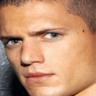

it's Gustavo Fring, the distance is 0.46325082


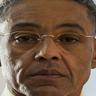

it's Walter White, the distance is 0.48166725


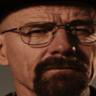

In [16]:
def testmodel():
	folder = "test/"

	
	for filename in os.listdir(folder):
		# path
		path = folder + filename
		face = extract_face(path,(96,96))
		# plot
		img = Image.fromarray(face, 'RGB')
		img.save(path, "JPEG", optimize=True)
		who_is_it(path, database, FRmodel)
testmodel()

Feel free to try it yourself. Remember to use the code below to transform your input to the correct form. Have fun!!

In [ ]:
'''
face = extract_face(path,(96,96))
		# plot
img = Image.fromarray(face, 'RGB')
img.save(path, "JPEG", optimize=True)
who_is_it(path, database, FRmodel)

'''